# Visualize for dataset and domain

In [132]:
def get_metrics(train_text_paths, val_text_paths):
    training_loss = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }

    training_acc = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }

    for text in train_text_paths:
        k_fold = text.split("/")[-1].split("_")[3]
        f = open(text, "r")
        for index, x in enumerate(f):
            if index == 0:
                continue
            loss = float(x.replace("\n", "").split(", ")[0])
            acc = float(x.replace("\n", "").split(", ")[1])
            if k_fold == "0":
                training_loss["fold_0"].append(loss)
                training_acc["fold_0"].append(acc)
            elif k_fold == "1":
                training_loss["fold_1"].append(loss)
                training_acc["fold_1"].append(acc)
            else:
                training_loss["fold_2"].append(loss)
                training_acc["fold_2"].append(acc)

    val_loss = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }

    val_acc = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }

    for text in val_text_paths:
        k_fold = text.split("/")[-1].split("_")[3]
        f = open(text, "r")
        for index, x in enumerate(f):
            if index == 0:
                continue
            loss = float(x.replace("\n", "").split(", ")[0])
            acc = float(x.replace("\n", "").split(", ")[1])
            if k_fold == "0":
                val_loss["fold_0"].append(loss)
                val_acc["fold_0"].append(acc)
            elif k_fold == "1":
                val_loss["fold_1"].append(loss)
                val_acc["fold_1"].append(acc)
            else:
                val_loss["fold_2"].append(loss)
                val_acc["fold_2"].append(acc)
    
    
    df_result_training_loss = pd.DataFrame(training_loss)
    df_result_val_loss = pd.DataFrame(val_loss)
    
    df_result_training_acc = pd.DataFrame(training_acc)
    df_result_val_acc = pd.DataFrame(val_acc)
    
    return [df_result_training_loss, df_result_val_loss, df_result_training_acc, df_result_val_acc]

In [133]:
import matplotlib.pyplot as plt
import glob

dictionary_metrics = {
    "amazon": None,
    "dslr": None,
    "webcam": None,
}

In [134]:
for domain in dictionary_metrics:
    train_paths = f"/Users/tuananh/tuananh/domain_calibration/experiments/Office/{domain}/*_train_*.txt"
    train_text_paths = glob.glob(train_paths)

    val_paths = f"/Users/tuananh/tuananh/domain_calibration/experiments/Office/{domain}/*_val_*.txt"
    val_text_paths = glob.glob(val_paths)
    
    dictionary_metrics[domain] = get_metrics(train_text_paths, val_text_paths)

In [147]:
def visualize(dictionary_metrics, name_domain):
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(f'Baseline model in domain: {name_domain}')
    fig.tight_layout()
    columns = 2
    rows = 2

    fig.add_subplot(rows, columns, 1)
    plt.plot(dictionary_metrics[name_domain][0]["fold_0"])
    plt.plot(dictionary_metrics[name_domain][0]["fold_1"])
    plt.plot(dictionary_metrics[name_domain][0]["fold_2"])
    plt.title('Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['fold_1', 'fold_2', 'fold_3'], loc='upper left')

    fig.add_subplot(rows, columns, 2)
    plt.plot(dictionary_metrics[name_domain][1]["fold_0"])
    plt.plot(dictionary_metrics[name_domain][1]["fold_1"])
    plt.plot(dictionary_metrics[name_domain][1]["fold_2"])
    plt.title('Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['fold_1', 'fold_2', 'fold_3'], loc='upper left')

    fig.add_subplot(rows, columns, 3)
    plt.plot(dictionary_metrics[name_domain][2]["fold_0"])
    plt.plot(dictionary_metrics[name_domain][2]["fold_1"])
    plt.plot(dictionary_metrics[name_domain][2]["fold_2"])
    plt.title('Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['fold_1', 'fold_2', 'fold_3'], loc='upper left')

    fig.add_subplot(rows, columns, 4)
    plt.plot(dictionary_metrics[name_domain][3]["fold_0"])
    plt.plot(dictionary_metrics[name_domain][3]["fold_1"])
    plt.plot(dictionary_metrics[name_domain][3]["fold_2"])
    plt.title('Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['fold_1', 'fold_2', 'fold_3'], loc='upper left')
    
    plt.show()

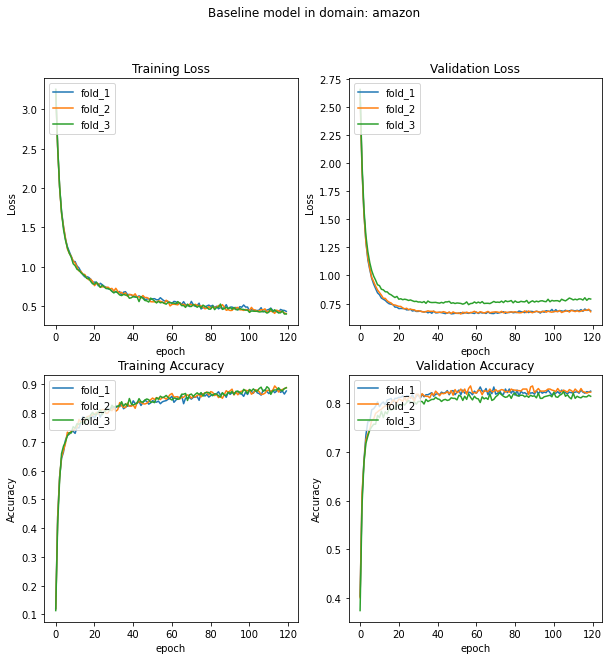

In [148]:
visualize(dictionary_metrics, "amazon")

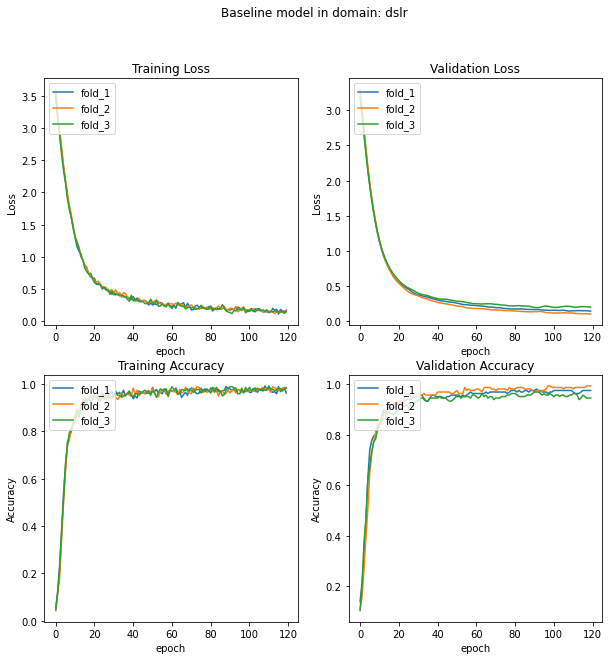

In [149]:
visualize(dictionary_metrics, "dslr")

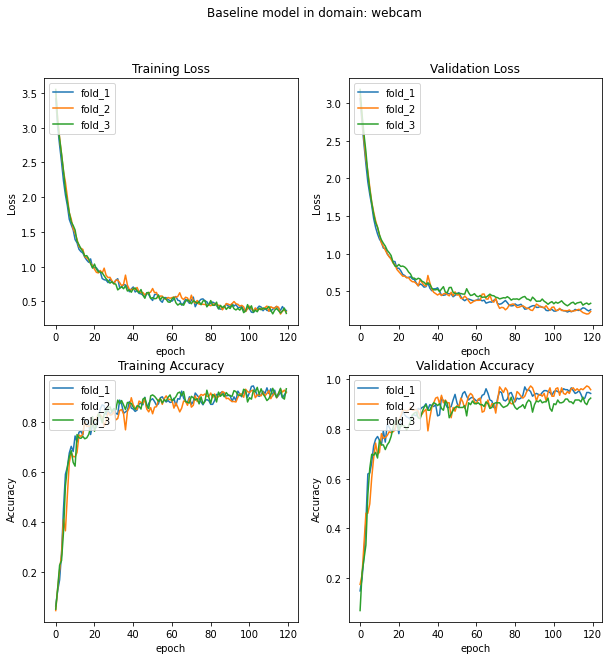

In [150]:
visualize(dictionary_metrics, "webcam")